# Introduction to neural network classification with TensorFlow

This notebook covers how to use neural networks for classification problems

A classification in when try to classify something as one thing or another

Types of Classification Models:
   * Binary Classification 
   * Multiclass Classification 
   * Multilabel Classification

## Creating Data to view and fit

In [3]:
from sklearn.datasets  import make_circles

# Make 1000 examples 
n_samples = 1000

# Create circles 
X, y = make_circles(n_samples, 
                   noise=0.03, 
                   random_state=42)

In [5]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Lets visualize the data 

In [9]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "Label":y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


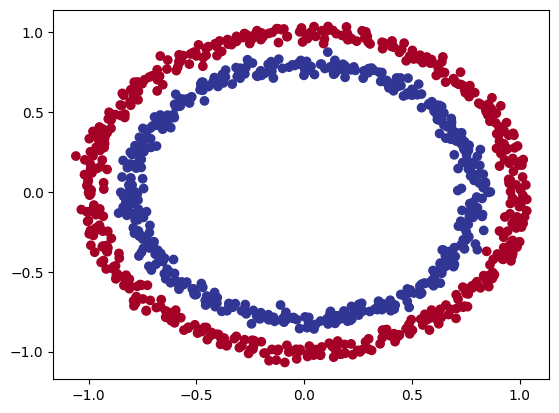

In [10]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [11]:
# Check the shapes of the features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# Check the sample size working with
len(X), len(y)

(1000, 1000)

In [16]:
# Check the first few examples
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modeling

Steps in modelling with TensorFlow typically:
1. Create or import ( reinforcement learning ) model
2. Compile the model
2. Fit the model
4. Evaluate the model
5. etc....(tweak)

In [17]:
import tensorflow as tf

2023-06-29 12:31:15.479678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# Set the random seed
tf.random.set_seed(42)

# Build the model using Sequential API 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model 
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.3011 - accuracy: 0.4580
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.2756 - accuracy: 0.4610
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 4.2594 - accuracy: 0.4630
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 4.1690 - accuracy: 0.4620
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 4.1155 - accuracy: 0.4650


From this accuracy percentage of 46% it can be concluded that the model is guessing for each one, it is getting almost 
50% percent of the guesses right

In [22]:
# Let's try to train for longer 
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4670


[0.6931502223014832, 0.46700000762939453]

Since the binary classification model, the 50% accuracy, the model is performing is guessing

In [23]:
# Seed
tf.random.set_seed(42)

# Model with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1), 
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [24]:
# Evaluate the model on the same model trained on 
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.4340


[0.7082907557487488, 0.4339999854564667]

## Improving Model

How to improve a classification model:
1. Create a model - increase layers (hidden units in a layer)
2. Compile a model - choose a different optimization function (Adam(), SGD())
3. Fitting a model - fit the model for more epochs ( train for longer )

In [25]:
# Seed
tf.random.set_seed(42)

# Model with 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add 10 dense neurons
    tf.keras.layers.Dense(1)
])


# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [26]:
# Evaluate the model ( not an ideal to evaluate on the same data)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5090


[0.6970694661140442, 0.5090000033378601]

## Visualize the Predictions

1. Take in the trained model
2. Features (X) and labels (y)
3. Create a meshgrid of the diff X_values
4. Make predictions acorss the meshgrid
5. Plot the predictions

In [27]:
import numpy as np

In [32]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary by a model predicting on X
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value ( Make the predictions here)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack the 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multiclass
    if len(y_pred[0] > 1):
        print("multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision bounday
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
multiclass classification


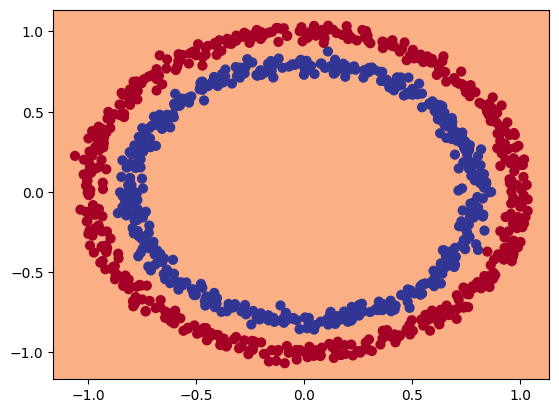

In [33]:
plot_decision_boundary(model=model_3,
                     X=X, 
                     y=y)

In [35]:
# Use this model in a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split the regression data into training and test splits
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model 
model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/Users/daviedev/.pyenv/versions/3.9.4/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/daviedev/.pyenv/versions/3.9.4/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/daviedev/.pyenv/versions/3.9.4/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/daviedev/.pyenv/versions/3.9.4/lib/python3.9/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/daviedev/.pyenv/versions/3.9.4/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/daviedev/.pyenv/versions/3.9.4/lib/python3.9/site-packages/keras/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_5' (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_5' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


change the model to suit the data because the loss function is on a binary but we want a regression problem

In [38]:
# Seed
tf.random.set_seed(42)

# Model with 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add 10 dense neurons
    tf.keras.layers.Dense(1)
])


# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 387.5769 - mae: 387.5769
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 302.3539 - mae: 302.3539
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 218.8602 - mae: 218.8602
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 130.6699 - mae: 130.6699
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 51.6022 - mae: 51.6022
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 69.4846 - mae: 69.4846
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 71.0508 - mae: 71.0508
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 49.7018 - mae: 49.7018
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 45.0274 - mae: 45.0274
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 46.8321 - mae: 46.8321
Epoch 11/100
5/5 [==============================]

2/2 [==============================] - 0s 3ms/step


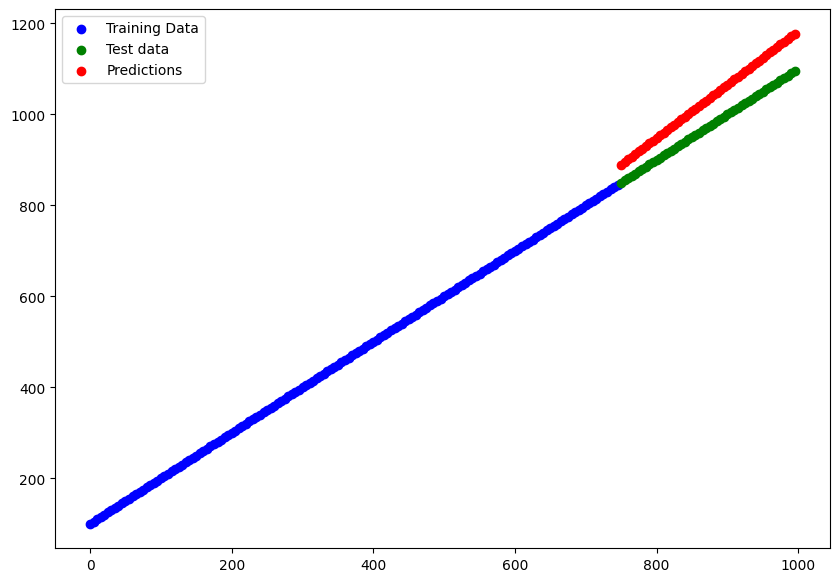

In [40]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model prediction against regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-Linearity

In [41]:
# Tensor Flow Excercise Playground

# set seed
tf.random.set_seed(42)

# Build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001), 
               metrics=["accuracy"])

# Fit the model
history = model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3433 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2748 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2460 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2422 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2331 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1895 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1839 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.1459 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0249 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9631 - accuracy: 0.5000
Epoch 11/

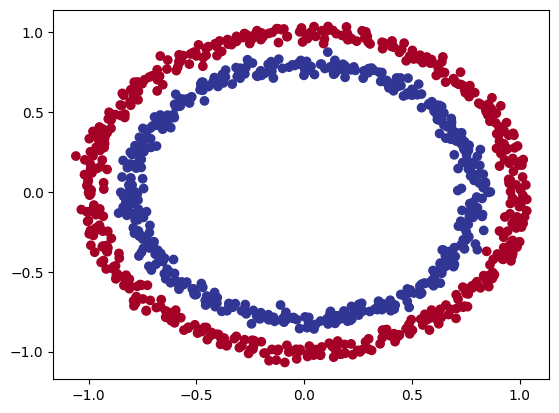

In [45]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
multiclass classification


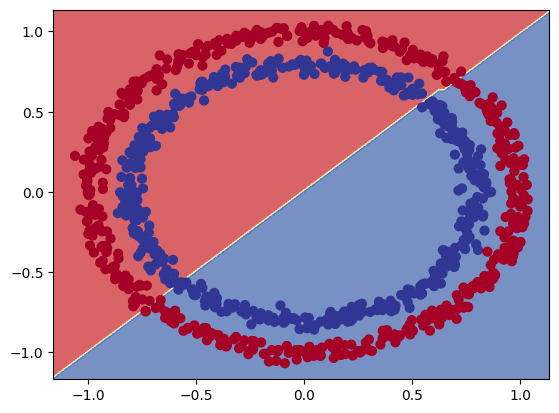

In [46]:
# Check the decision boundary for the latest model
plot_decision_boundary(model=model_4, 
                      X=X,
                      y=y)

## Build a N.N with non-linear activation form

In [47]:
# Set Random Seed
tf.random.set_seed(42)

# Create a model with a non-linear activation 
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model 
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

# Fit the model
history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 5.3446 - accuracy: 0.4969
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2519 - accuracy: 0.4985
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2533 - accuracy: 0.4985
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2074 - accuracy: 0.4996
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.1876 - accuracy: 0.4994
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2052 - accuracy: 0.4981
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1907 - accuracy: 0.4993
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1986 - accuracy: 0.4985
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1866 - accuracy: 0.5002
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.1529 - accuracy: 0.5008
Epoch 11/

## TensorFlow Playground
1. Increase number of hidden layers
2. Number of neurons
3. Acitvation to "relu"

In [ ]:
# In the playground I set the number of hidden layers to = 4
# Number of neurons for each hidden layer is set to 8~10
# Learning rate is set to 0.001 using Adam()
# Activation is set to "relu"

In [48]:
# Set the seed
tf.random.set_seed(42)


# Build the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

# Fit the model
history = model_6.fit(tf.expand_dims(X, axis=-1), y, epochs=500, verbose=0)

In [49]:
model_6.evaluate(X, y)

32/32 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5075


[0.6930747628211975, 0.5074687600135803]

313/313 [==============================] - 1s 2ms/step
multiclass classification


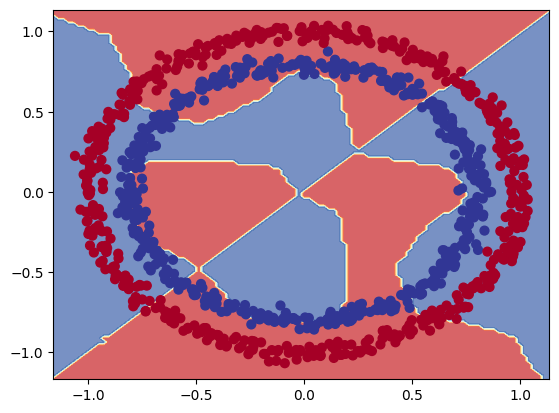

In [50]:
# How does this model prediction look?
plot_decision_boundary(model_6, X, y)

In [57]:
# Set the seed
tf.random.set_seed(42)

# Build the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=300, verbose=0)

In [58]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000


[0.00299191870726645, 1.0]

313/313 [==============================] - 0s 1ms/step
multiclass classification


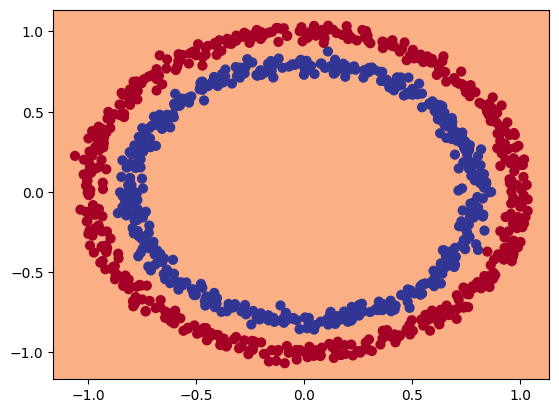

In [60]:
# Visualize the data
plot_decision_boundary(model_7, X, y)

In [61]:
# Work with Toy Tensor
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

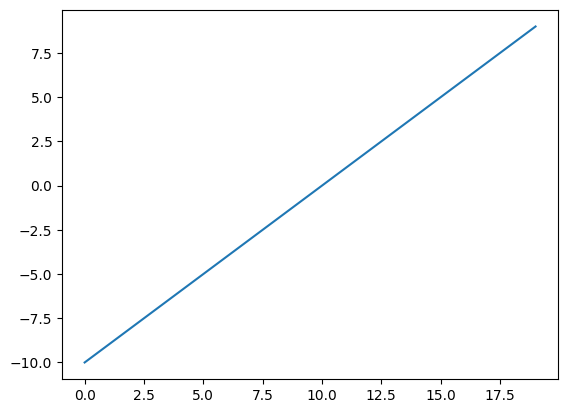

In [63]:
# Visualize the Tensor
plt.plot(A)

In [64]:
# Going to replicate sigmoid - sigmoid(X) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function in the A dummy tensor
sigmoid_A = sigmoid(A)

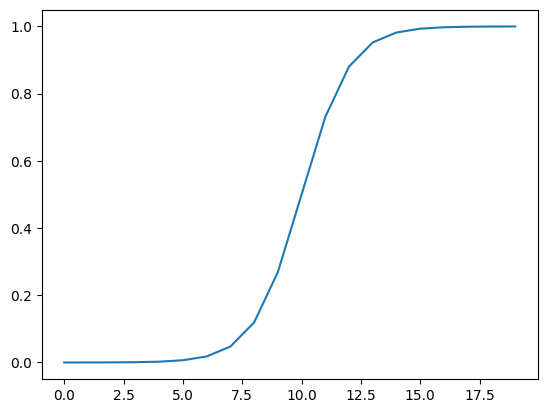

In [65]:
# Plot
plt.plot(sigmoid_A)

In [66]:
# Replicate the ReLU function
def relu(X):
    return tf.maximum(0, X)

# Pass the toy tensor into the relu function
relu_A = relu(A)

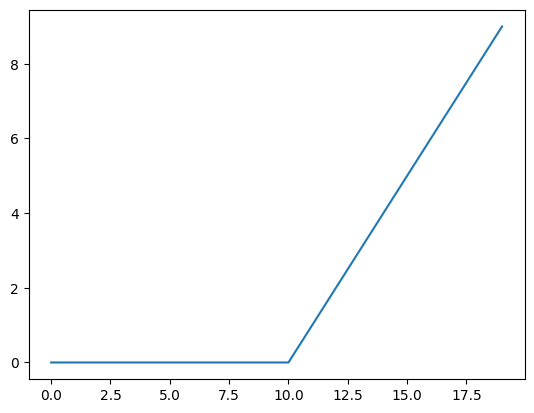

In [67]:
# Plot 
plt.plot(relu_A)

## Evaluating and improving Classification

So far been training testing and training on same data set

Create a training and test test

In [69]:
# Check how many examples are in the data sets
len(X)

1000

In [70]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [72]:
# Split onto train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [75]:
# Recreate a model to fit on the training data - evaluate on the test data

# Set the seed
tf.random.set_seed(42)

# Build the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.4950
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.5375
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5500
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6595 - accuracy: 0.6388
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6250
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6052 - accuracy: 0.7450
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.8250
Epoch 8/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5217 - accuracy: 0.8525
Epoch 9/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4591 - accuracy: 0.9225
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3951 - accuracy: 0.9500
Epoch 11/50
25/25 [

In [76]:
# Evaluate the model on the test result ( it has not seen this before )
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9900


[0.026598326861858368, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
multiclass classification
313/313 [==============================] - 1s 2ms/step
multiclass classification


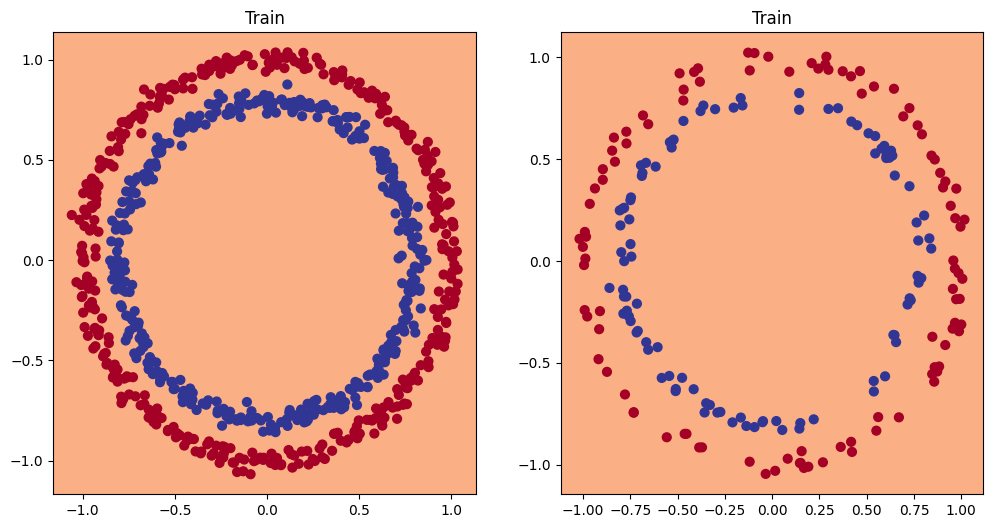

In [77]:
# Plot the decision boundaries for the training and test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Train")
plot_decision_boundary(model_8, X=X_test, y=y_test)

## Plot the loss and (or training curves)

In [81]:
# History.history gives a record of the output metrics
pd.DataFrame(history.history).head()


,loss,accuracy
0,0.691426,0.49500
1,0.683797,0.53750
2,0.673975,0.55000
3,0.659543,0.63875
4,0.638260,0.62500


Text(0.5, 1.0, 'Model_8 loss curve')

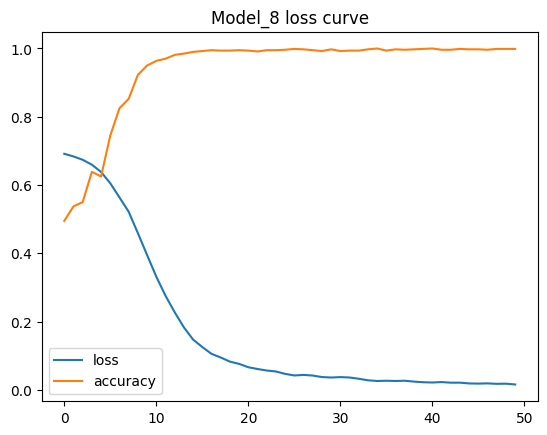

In [82]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curve")

**Note** 
For many problem the loss function going down is good, the predictions being made are getting
closer to the actual number

## Find the best learning rate 

In [83]:
# New model

# Seed
tf.random.set_seed(42)

# Build Model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Create Learning Rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# Fit the model
history = model_9.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 5ms/step - loss: 0.7266 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7257 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 0.7247 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7236 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.5138 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 0.7201 - accuracy: 0.5125 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.7188 - accuracy: 0.5125 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss:

<AxesSubplot: xlabel='epochs'>

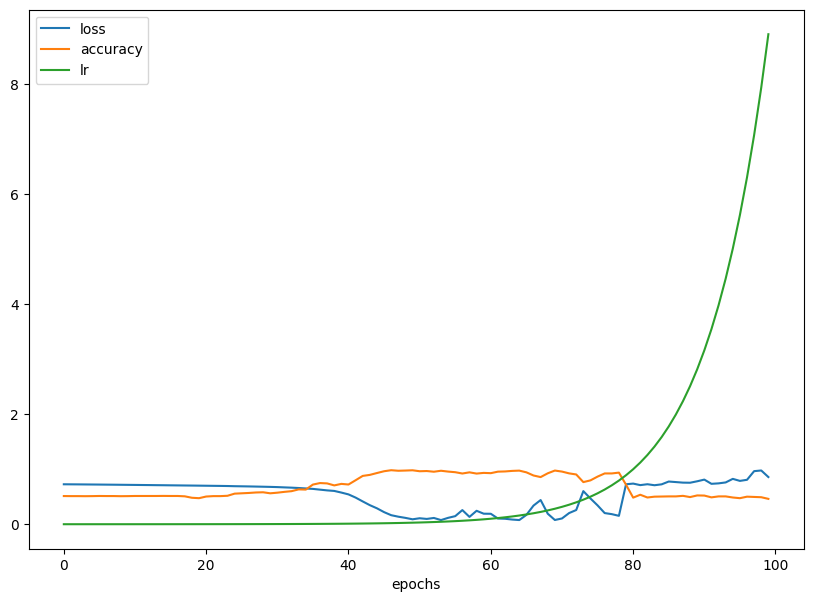

In [84]:
# Check history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

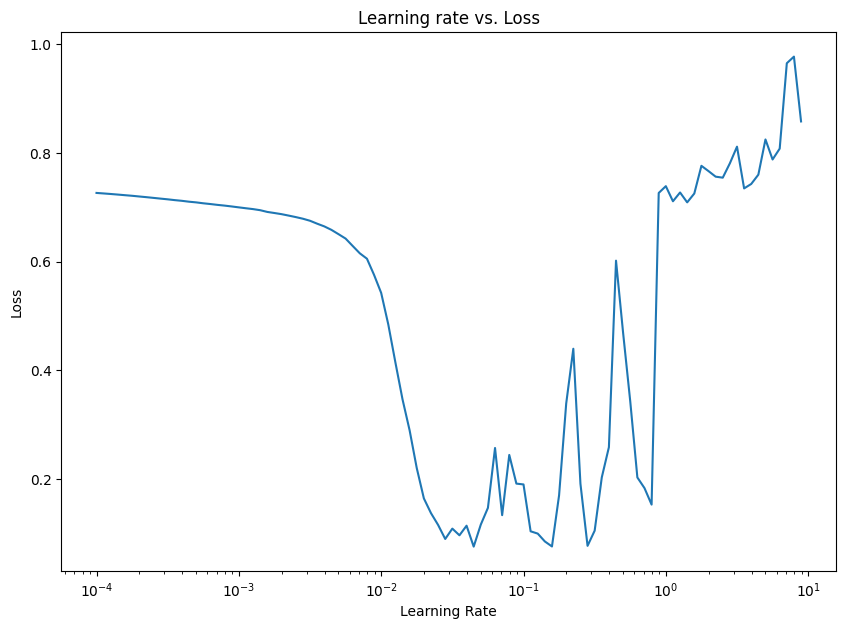

In [88]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [89]:
# Try using a higher ideal learning rate 0.02

# Seed
tf.random.set_seed(42)

# Build
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])
    
# Fit the model 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 8ms/step - loss: 0.6891 - accuracy: 0.5038
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5975
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6498 - accuracy: 0.6062
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6048 - accuracy: 0.6975
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7500
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.7788
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.8238
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4156 - accuracy: 0.8400
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3780 - accuracy: 0.8700
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3393 - accuracy: 0.8925
Epoch 11/20
25/25 [

In [90]:
# Evaluate model_10 on test data
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9900


[0.049568966031074524, 0.9900000095367432]

In [91]:
# Evaluate model_8 on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9900


[0.026598326861858368, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
multiclass classification
313/313 [==============================] - 1s 3ms/step
multiclass classification


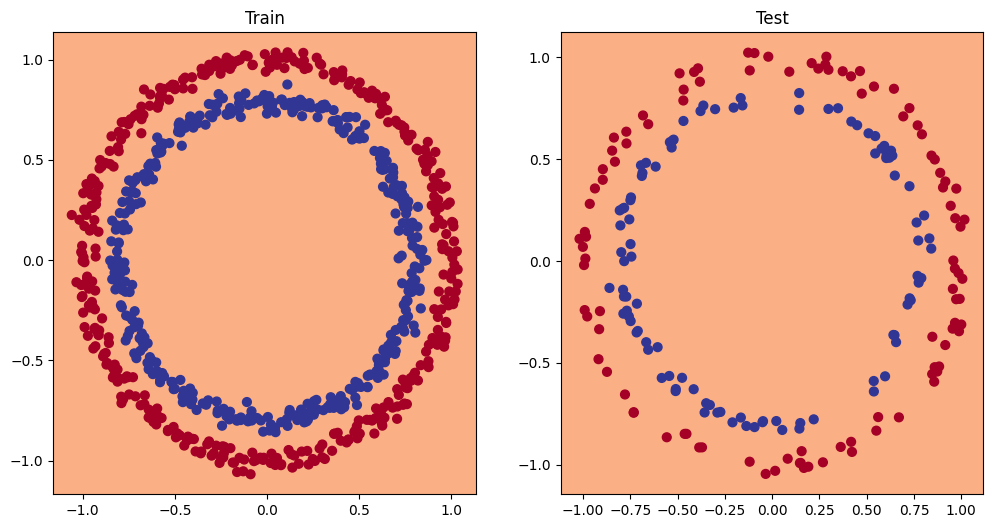

In [93]:
# Plot the decision broundary 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## Classification Evaluation Methods

Handful Classification Evaluation Methods:
1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. Confusion Matrix
6. Classification Report Sklearn

In [94]:
# Check the accuracy of the model
loss, accuracy = model_10.evaluate(X_test, y_test) 
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9900
Model loss on test set: 0.049568966031074524
Model accuracy on test set: 99.00%


In [95]:
# Check the precision of the model
import sklearn.metrics as metrics

# Make predictions on the test set
y_pred = model_10.predict(X_test)
y_pred = (y_pred > 0.5)  # Thresholding the predictions

# Calculate precision and recall
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

7/7 [==============================] - 0s 2ms/step
Precision: 0.98
Recall: 1.00


## Confusion Matrix 

In [96]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make Predictions
y_preds = model_10.predict(X_test)

# Create the confusion Matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [97]:
y_test.shape, y_preds.shape

((200,), (200, 1))

In [98]:
# Convert the prediction array to zeros - ones
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [101]:
first_cm = confusion_matrix(y_test, tf.round(y_preds))

Make the confusion matrix pretty 

In [103]:
# Confusion Matrix remix sklearn plot confusion matrix
def plot_confusion_matrix(cm):
    # Compute percentages for each cell in the confusion matrix
    total = cm.sum(axis=1)[:, np.newaxis]
    percentages = np.round(cm / total, 2)

    # Plot confusion matrix with percentages
    plt.imshow(percentages, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])

    # Add percentages inside the boxes
    thresh = percentages.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, percentages[i, j],
                     horizontalalignment="center",
                     color="white" if percentages[i, j] > thresh else "black")

    plt.show()

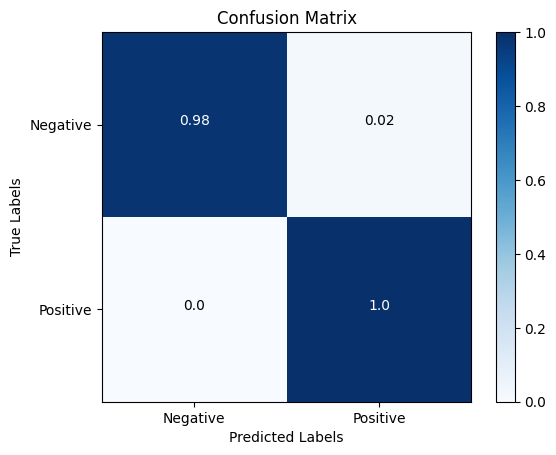

In [104]:
plot_confusion_matrix(cm=first_cm)

# Working with a Larger Example (multiclass classification)

More than two classes as an option, it's known as **multi-class classification**
* This means if you have 3 different classes, it's multi-class classification
* 100 different classses it is still multiclass classification

Practice multiclass classification
Building a neural network to classify images of different items of clothing

In [105]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data is sorted into training data and test data 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [106]:
# Show the first training example FIRST EXAMPLE TO LOOK AT
print(f'Training Sample:\n{train_data[0]}\n')
print(f'Training Label:\n{train_labels[0]}\n')

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [108]:
# Check the shape of a single data
train_data[0].shape, train_labels[0].shape

# This tells me that the train_data has 28 items in 28 categories
# and the label is a scalar 

((28, 28), ())

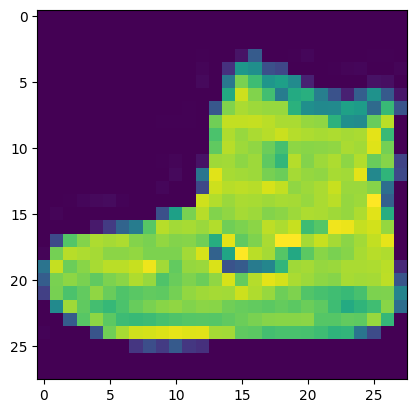

In [118]:
# Plot a single example: 
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [117]:
# Check out the label data image
train_labels[0]

9

In [119]:
# Create a small list to index on the training label - human readable 
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Dress')

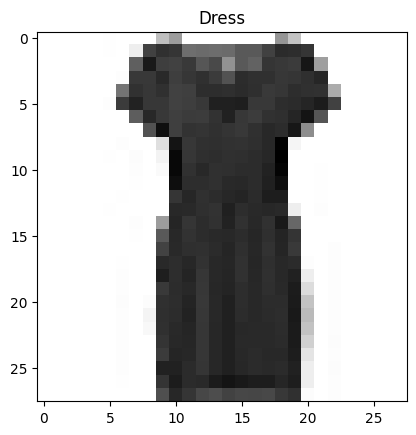

In [124]:
# Plot an example image and its label
index_choice = 20
plt.imshow(train_data[index_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_choice]])

In [142]:
print(f'Example: {train_labels[40]}')

Example: 6


In [126]:
len(train_labels)

60000

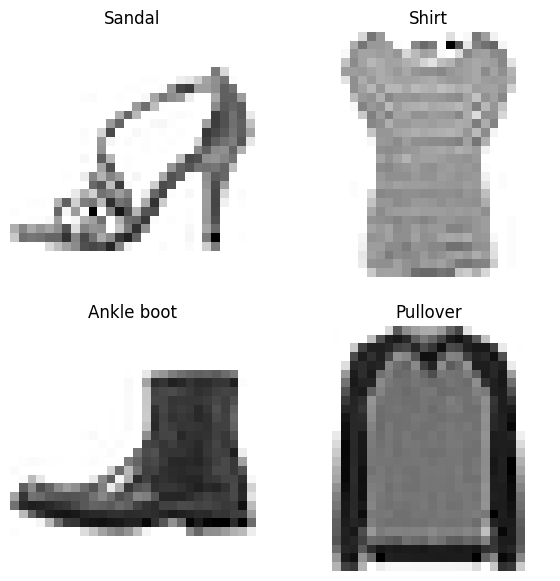

In [139]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Build a multi-class classification model

For a multi-class classification model ~ similar to a binary classification model, few different things
* Input Shape - (28, 28)
* Output Shape - (10) one per class of clothing
* Loss Function - CategoricalCrossentropy()
* Output layer activation - softmax not sigmoid

* If labels are one-hot encoding use `tf.keras.losses.CategoricalCrossentropy()`,
* If the labels are not one-hot encoding use `tf.keras.losses.SparseCategoricalCrossentropy()`

In [143]:
train_data[0].shape

(28, 28)

In [151]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [153]:
# Seed
tf.random.set_seed(42)

# Build Model
model_cloth = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the Model
model_cloth.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics=["accuracy"])

# Fit the Model
non_norm_history = model_cloth.fit(train_data,
                                   train_labels, 
                                   epochs=10,
                                   validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3095 - accuracy: 0.1010 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3040 - accuracy: 0.0975 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - val_accuracy:

In [154]:
model_cloth.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_64 (Dense)            (None, 4)                 3140      
                                                                 
 dense_65 (Dense)            (None, 4)                 20        
                                                                 
 dense_66 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [155]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefered to be scaled - normalized - like to have numbers in the Tensors
when to find patterns from 0 - > 1 right now it is at 0 - 225

In [156]:
# Can get training data and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

# Check the min and max values of the train_data_norm and the test_data_norm
train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [158]:
# Now the data is normalized let's build a model on this 

# Seed
tf.random.set_seed(42)

# Build Model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the Model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

# Fit the Model
norm_history = model_12.fit(train_data_norm,
                                   train_labels, 
                                   epochs=10,
                                   validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3411 - accuracy: 0.5081 - val_loss: 0.9538 - val_accuracy: 0.6275
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8816 - accuracy: 0.6458 - val_loss: 0.8589 - val_accuracy: 0.6557
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8228 - accuracy: 0.6663 - val_loss: 0.8307 - val_accuracy: 0.6714
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7939 - accuracy: 0.6804 - val_loss: 0.8089 - val_accuracy: 0.6802
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7749 - accuracy: 0.6938 - val_loss: 0.7967 - val_accuracy: 0.6979
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7454 - accuracy: 0.7237 - val_loss: 0.7761 - val_accuracy: 0.7263
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7115 - accuracy: 0.7496 - val_loss: 0.7372 - val_accuracy

 > Note: neural networks prefer data in numerical form / as well as normalized form from 0 -> 1

<AxesSubplot: title={'center': 'Normalized data'}>

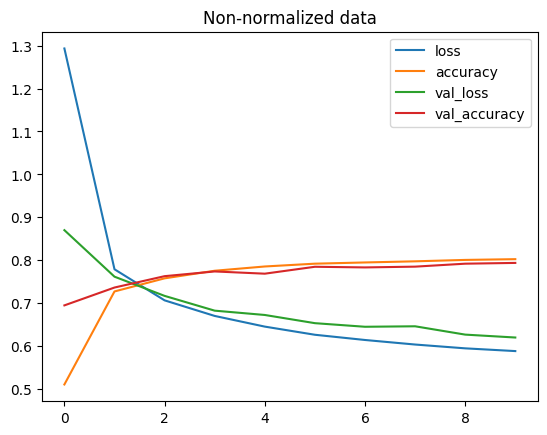

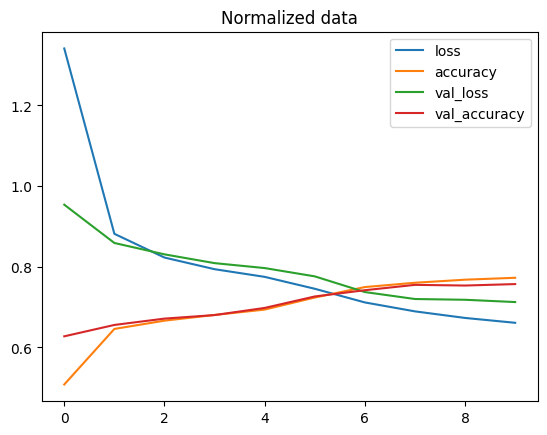

In [162]:
# Compare the loss curves between normalized and non-normalized loss curves
import pandas as pd

# Plot the non_normalized loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot the normalizes loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")


## Find the ideal learning rate  - value where the loss decreases the most

In [165]:
# Set random seed
tf.random.set_seed(42)


# Build the model
model_13 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28, 28)), 
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                              train_labels, 
                              epochs=40, 
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0946 - accuracy: 0.6433 - val_loss: 0.7315 - val_accuracy: 0.7693 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6626 - accuracy: 0.7882 - val_loss: 0.6493 - val_accuracy: 0.7855 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.8016 - val_loss: 0.6142 - val_accuracy: 0.7845 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5646 - accuracy: 0.8072 - val_loss: 0.5972 - val_accuracy: 0.7906 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5481 - accuracy: 0.8090 - val_loss: 0.5672 - val_accuracy: 0.8034 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5386 - accuracy: 0.8110 - val_loss: 0.5795 - val_accuracy: 0.7963 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Find the ideal Learning Rate')

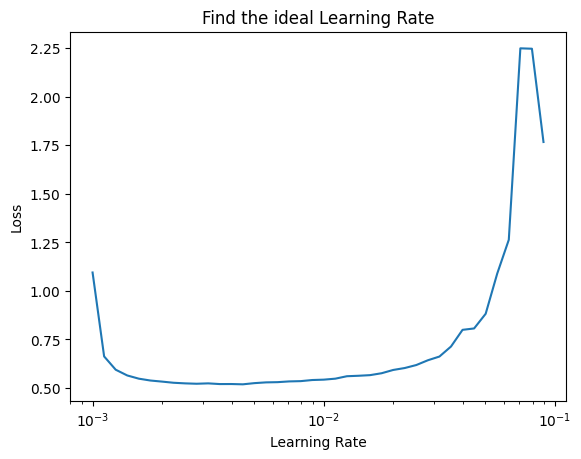

In [169]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Find the ideal Learning Rate")

In [170]:
10 ** -3

0.001

In [172]:
# Fit the model with the ideal learning rate


# Set seed
tf.random.set_seed(42)

# Build model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_14=model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3831 - accuracy: 0.4455 - val_loss: 1.0357 - val_accuracy: 0.5835
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9307 - accuracy: 0.6317 - val_loss: 0.8753 - val_accuracy: 0.6586
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8174 - accuracy: 0.6987 - val_loss: 0.8049 - val_accuracy: 0.7099
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7634 - accuracy: 0.7242 - val_loss: 0.7675 - val_accuracy: 0.7195
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7205 - accuracy: 0.7420 - val_loss: 0.7339 - val_accuracy: 0.7550
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6876 - accuracy: 0.7558 - val_loss: 0.7049 - val_accuracy: 0.7535
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6640 - accuracy: 0.7621 - val_loss: 0.6850 - val_accuracy:

## Evaluate the Multi-class classification model

Actions to take: 
* Create a confusion matrix 
* Through visualization 
* Improve the results by training for longer 
* Change the architecture
* Save and export the model for an application

In [176]:
# create a confusion matrix
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [180]:
# Make some predictions with the model
y_probs=model_14.predict(test_data_norm)  # probs is short for prediction probablities

y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.0040236e-10, 1.4503714e-09, 2.6861124e-10, 4.1450994e-07,
        1.5839535e-09, 1.2863629e-01, 1.1863190e-10, 4.4257320e-02,
        5.4680600e-06, 8.2710063e-01],
       [3.8366873e-02, 2.3348119e-04, 6.3857734e-01, 3.8039917e-03,
        8.7926939e-02, 2.1207301e-05, 2.3071106e-01, 2.4151273e-05,
        3.3479420e-04, 6.3767196e-08],
       [1.6966110e-04, 9.9914747e-01, 5.0151058e-16, 6.8282359e-04,
        6.3715137e-26, 2.9449562e-17, 3.6046580e-10, 2.6247443e-21,
        8.3032767e-17, 0.0000000e+00],
       [1.0474465e-06, 9.9987054e-01, 2.2902351e-17, 1.2817500e-04,
        5.7656595e-29, 2.8327040e-07, 1.2326834e-13, 2.3384034e-15,
        1.6356961e-17, 0.0000000e+00],
       [1.4856993e-01, 1.6933254e-03, 3.1720206e-01, 2.1924766e-02,
        2.5505083e-02, 3.8840585e-06, 4.8457921e-01, 7.2236621e-06,
        5.1445380e-04, 1.3036162e-11]], dtype=float32)

> IMPORTANT: Remember to make prediction on the same type of data the model was trained on.
> IMPORTANT: If the model trained on normalized data, best to make predictions on normalized data.

In [189]:
# Returns the output percentage of which one it thinks it might be
# Use tensorflow argmax to see the max value of the tensor to see what 
# the model really thinks it might be
tf.argmax(y_probs[0])


# Here for the y_probs[0] the model has a higher percentage in assuming it is a 'AnkleBoot'
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [183]:
y_probs[0]

array([1.0040236e-10, 1.4503714e-09, 2.6861124e-10, 4.1450994e-07,
       1.5839535e-09, 1.2863629e-01, 1.1863190e-10, 4.4257320e-02,
       5.4680600e-06, 8.2710063e-01], dtype=float32)

In [191]:
# Convert all prediction probabilites into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7])

In [194]:
from sklearn.metrics import confusion_matrix

second_cm = confusion_matrix(y_true=test_labels, y_pred=y_preds)

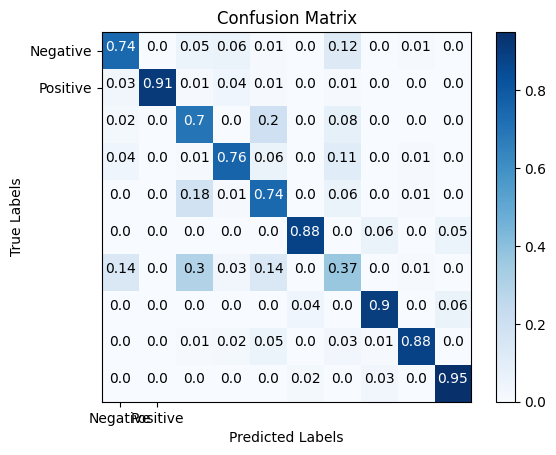

In [195]:
# Make the confusion matrix more appealing
plot_confusion_matrix(second_cm)

In [199]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
"""  
# Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

# Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
     # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

      # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

      # Label the axes
    ax.set(title="Confusion Matrix",
             xlabel="Predicted label",
             ylabel="True label",
             xticks=np.arange(n_classes), # create enough axis slots for each class
             yticks=np.arange(n_classes), 
             xticklabels=labels, # axes will labeled with class names (if they exist) or ints
             yticklabels=labels)

      # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

      # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

      # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

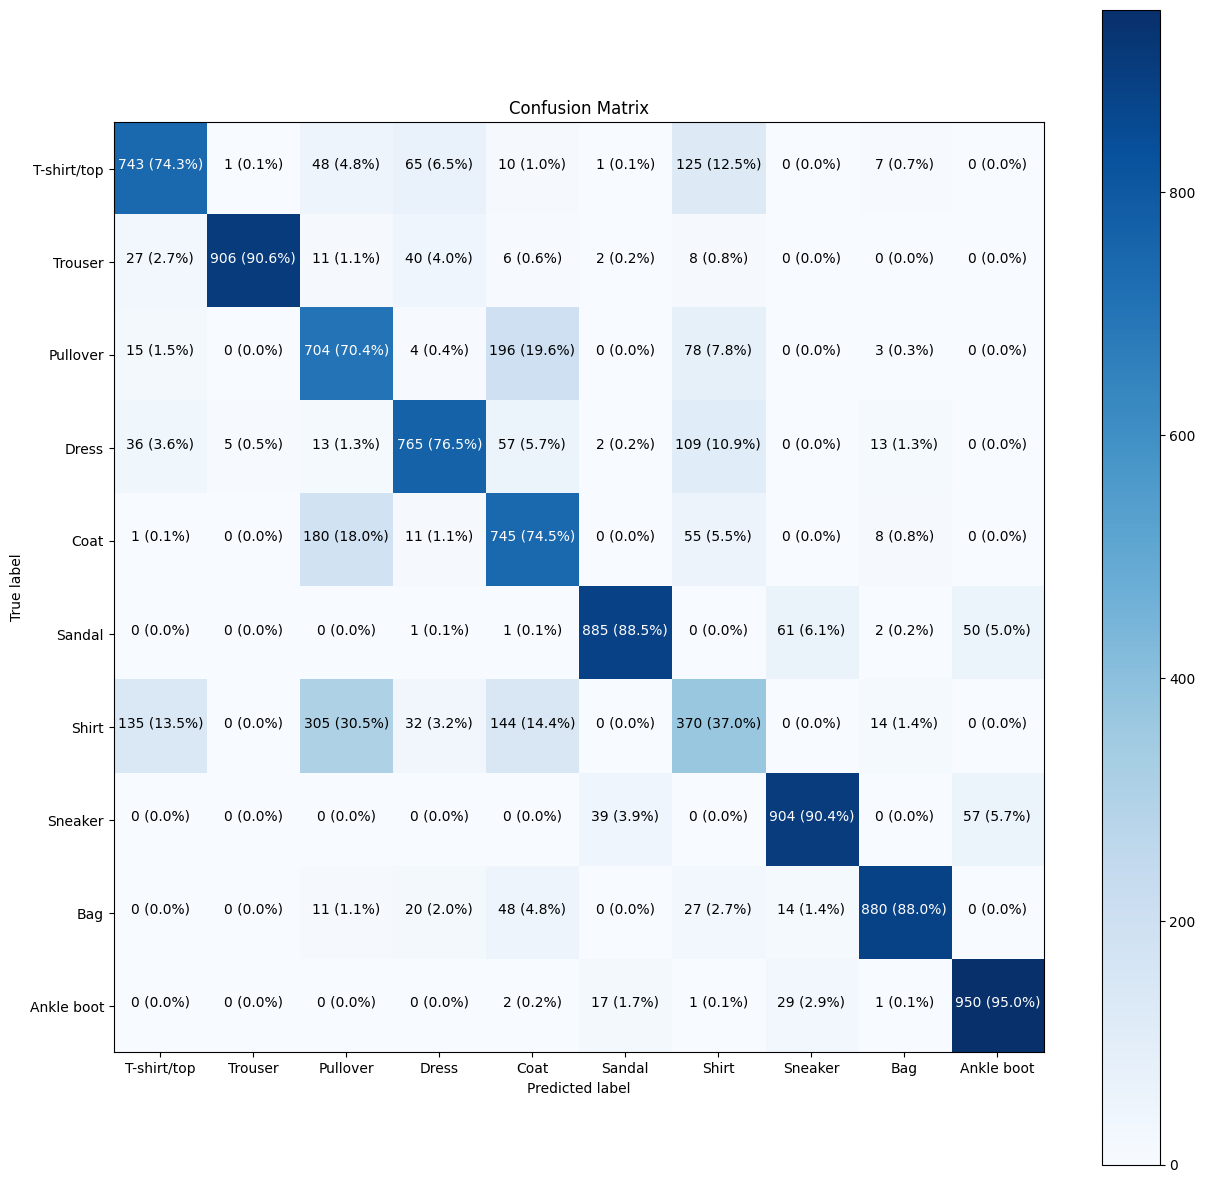

In [202]:
# Use the example function to create a Confusion Matrix: 
make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(15,15),
                     text_size=10)

**NOTE** > Often when working with images and other forms
of visual data, its good idea to visualize as much as possible
to develop further understanding of the data, and the inputs -> outputs of the model


Function:
* Plot a random imgage
* Make a prediction on the image
* Label the Plot with the truth label and predicted label

In [215]:
import random 

def plot_random_images(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label
    """
    # Set up random integer
    i = random.randint(1,len(images))
    
    # Create Images and targets
    target_image = images[i]
    preds_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[preds_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image 
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is correct or not
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
        
    # Add xLabel information
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(preds_probs),
                                                    true_label),
              color=color) # set the color green or red if the prediction is correct or wrong

1/1 [==============================] - 0s 34ms/step


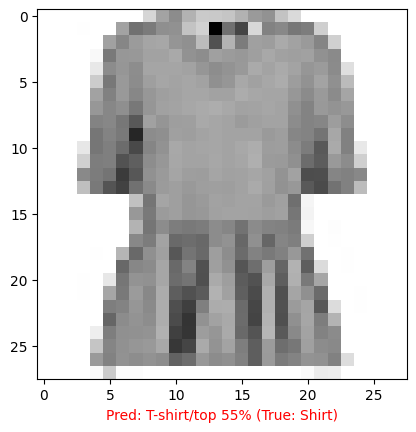

In [228]:
# Check out the random image as well as its prediction
# PREDICTIONS ON DATA THE MODEL WAS TRAINED ON
plot_random_images(model=model_14, 
                   images=test_data_norm,
                   true_labels=test_labels,
                   classes=class_names)

## What patterns is the Model Learning?

In [229]:
model_14.layers

In [231]:
# Extract a layer
model_14.layers[1]

In [236]:
# Get the pattern of a layer in the model
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.33731094, -0.6701275 ,  0.5274172 , -0.2827278 ],
        [ 0.27892178, -0.39030388,  0.64130485, -0.38116834],
        [ 0.9694631 , -1.0273247 ,  0.09653211, -0.84564745],
        ...,
        [-0.38718712, -0.24614947,  0.33000562, -0.14415094],
        [-0.04823741,  0.25315776,  0.5790891 , -0.7143497 ],
        [ 0.22328326,  0.00308602,  0.6940354 , -0.11815713]],
       dtype=float32),
 (784, 4))

In [237]:
28 * 28

784

In [239]:
model_14.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_82 (Dense)            (None, 4)                 3140      
                                                                 
 dense_83 (Dense)            (None, 4)                 20        
                                                                 
 dense_84 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [240]:
# Check out the bias vector
biases, biases.shape

(array([-0.96723723,  1.4213457 ,  1.5601786 ,  0.26569858], dtype=float32),
 (4,))

> Every neuron has a bias vector - each of these is paired with a weights matrix.
> The bias vector gets initialized into zeros - tf dense layer
> The bias vector dictated how much the patterns within the corresponding weights matrix should influence the next layer

In [241]:
model_14.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_82 (Dense)            (None, 4)                 3140      
                                                                 
 dense_83 (Dense)            (None, 4)                 20        
                                                                 
 dense_84 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [244]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
